In [1]:
#DATA COLLECTION
import pandas as pd
import os

file_path = "C:/Users/Gokul/Downloads/IEA Global EV Data 2024.csv"

df = pd.read_csv(file_path)

df.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011.0,percent,0.00039
1,Australia,Historical,EV sales share,Cars,EV,2011.0,percent,0.00650
2,Australia,Historical,EV sales,Cars,BEV,2011.0,Vehicles,49.00000
3,Australia,Historical,EV stock,Cars,BEV,2011.0,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012.0,Vehicles,220.00000


In [3]:
df.info()

df.describe(include='all').T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12378 entries, 0 to 12377
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      11006 non-null  object 
 1   category    11006 non-null  object 
 2   parameter   11006 non-null  object 
 3   mode        11006 non-null  object 
 4   powertrain  11006 non-null  object 
 5   year        11006 non-null  float64
 6   unit        11006 non-null  object 
 7   value       11006 non-null  float64
dtypes: float64(2), object(6)
memory usage: 773.8+ KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
region,11006,54,World,974,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category,11006,3,Historical,9174,NaN,NaN,NaN,NaN,NaN,NaN,NaN
parameter,11006,8,EV stock,3041,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mode,11006,5,Cars,4316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
powertrain,11006,6,EV,4174,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,11006.0,NaN,NaN,NaN,2018.29811,3.762133,2010.0,2015.25,2019.0,2021.0,2023.0
unit,11006,6,Vehicles,5986,NaN,NaN,NaN,NaN,NaN,NaN,NaN
value,11006.0,NaN,NaN,NaN,92843.845695,821901.652374,0.000001,1.5,77.0,2500.0,28000000.0


In [5]:
# Ensure there are no unexpected spaces or casing issues
df['region'] = df['region'].str.strip().str.lower()

# Filter out anything containing 'world' exactly
df = df[df['region'] != 'world']

# If 'region' could have extra words (like "World Total"), use:
df = df[~df['region'].str.contains('world', case=False, na=False)]

# Check unique region values after filtering
print(df['region'].unique())

['australia' 'austria' 'belgium' 'brazil' 'bulgaria' 'canada' 'chile'
 'china' nan 'colombia' 'costa rica' 'croatia' 'cyprus' 'czech republic'
 'denmark' 'estonia' 'eu27' 'europe' 'finland' 'france' 'germany' 'greece'
 'hungary' 'iceland' 'india' 'indonesia' 'ireland' 'israel' 'italy'
 'japan' 'korea' 'latvia' 'lithuania' 'luxembourg' 'mexico' 'netherlands'
 'new zealand' 'norway' 'poland' 'portugal' 'romania' 'seychelles'
 'slovakia' 'slovenia' 'south africa' 'spain' 'sweden' 'switzerland'
 'thailand' 'turkiye' 'united arab emirates' 'united kingdom' 'usa']


In [7]:
# Check missing values
df.info()
df.isna().sum()

# Drop irrelevant columns if necessary
df = df.dropna(subset=["value"])  # remove rows with missing sales values
df = df.drop_duplicates()

# Filter only EV sales data
df_sales = df[df["parameter"].str.contains("EV sales", case=False, na=False)]

# Convert to proper datatypes
df_sales["year"] = pd.to_numeric(df_sales["year"], errors="coerce")
df_sales["value"] = pd.to_numeric(df_sales["value"], errors="coerce")
# Remove rows where region is 'World'
df = df[df["region"] != "World"]

# Check remaining unique regions
df["region"].unique()


# Check cleaned dataset
df_sales.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 10726 entries, 0 to 11403
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      9354 non-null   object 
 1   category    9354 non-null   object 
 2   parameter   9354 non-null   object 
 3   mode        9354 non-null   object 
 4   powertrain  9354 non-null   object 
 5   year        9354 non-null   float64
 6   unit        9354 non-null   object 
 7   value       9354 non-null   float64
dtypes: float64(2), object(6)
memory usage: 754.2+ KB


C:\Users\Gokul\AppData\Local\Temp\ipykernel_16788\4107563059.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sales["year"] = pd.to_numeric(df_sales["year"], errors="coerce")
C:\Users\Gokul\AppData\Local\Temp\ipykernel_16788\4107563059.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sales["value"] = pd.to_numeric(df_sales["value"], errors="coerce")


,year,value
count,3922.000000,3.922000e+03
mean,2018.182050,3.294531e+04
std,3.718205,2.550949e+05
min,2010.000000,3.200000e-05
25%,2015.000000,2.000000e+00
50%,2019.000000,3.550000e+01
75%,2021.000000,1.100000e+03
max,2023.000000,5.400000e+06


In [9]:
# Remove rows where region is 'World'
df = df[df["region"] != "World"]

# Check remaining unique regions
df["region"].unique()

array(['australia', 'austria', 'belgium', 'brazil', 'bulgaria', 'canada',
       'chile', 'china', 'colombia', 'costa rica', 'croatia', 'cyprus',
       'czech republic', 'denmark', 'estonia', 'eu27', 'europe',
       'finland', 'france', 'germany', 'greece', 'hungary', 'iceland',
       'india', 'indonesia', 'ireland', 'israel', 'italy', 'japan',
       'korea', 'latvia', 'lithuania', 'luxembourg', 'mexico',
       'netherlands', 'new zealand', 'norway', 'poland', 'portugal',
       'romania', 'seychelles', 'slovakia', 'slovenia', 'south africa',
       'spain', 'sweden', 'switzerland', 'thailand', 'turkiye',
       'united arab emirates', 'united kingdom', 'usa'], dtype=object)

In [11]:
# Remove future / projected years
df = df[df["year"] <= 2023]

# (Optional) verify
print("✅ Years remaining in dataset:", sorted(df["year"].unique()))

✅ Years remaining in dataset: [2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 2017.0, 2018.0, 2019.0, 2020.0, 2021.0, 2022.0, 2023.0]


C:\Users\Gokul\AppData\Local\Temp\ipykernel_16788\102755492.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.values, y=region_sales.index, palette="viridis")


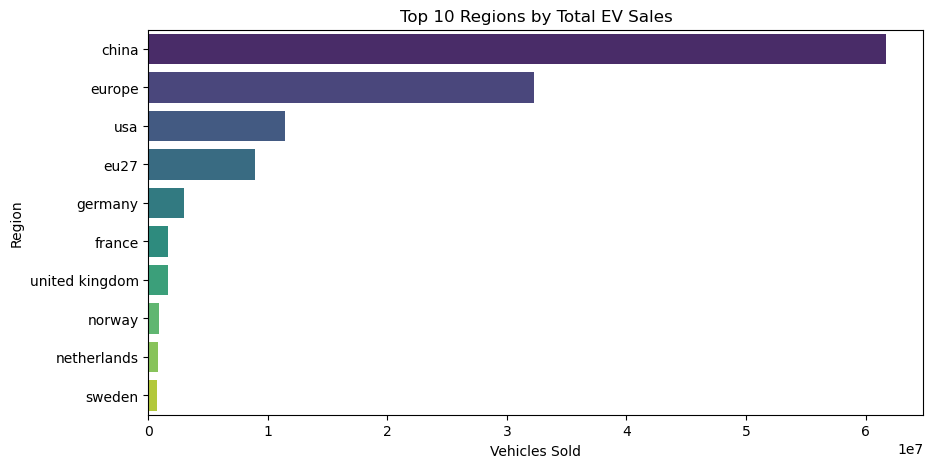

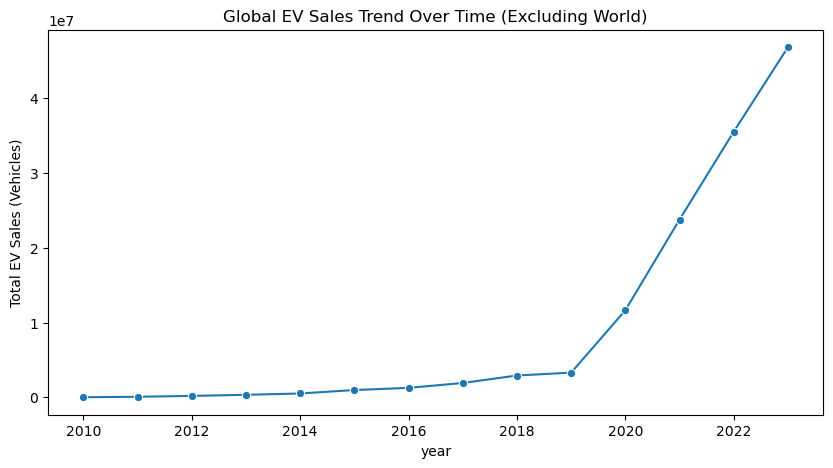

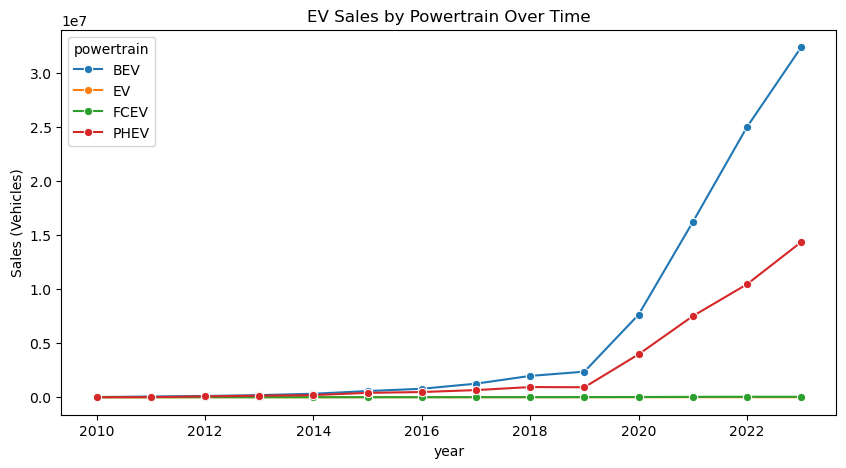

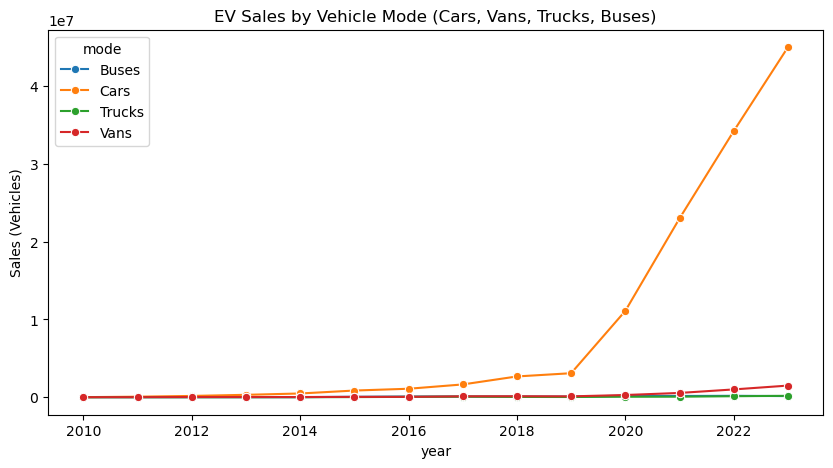

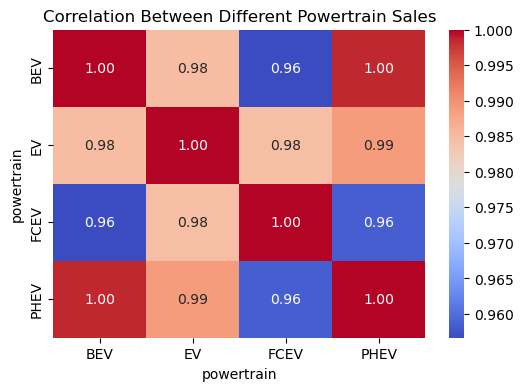

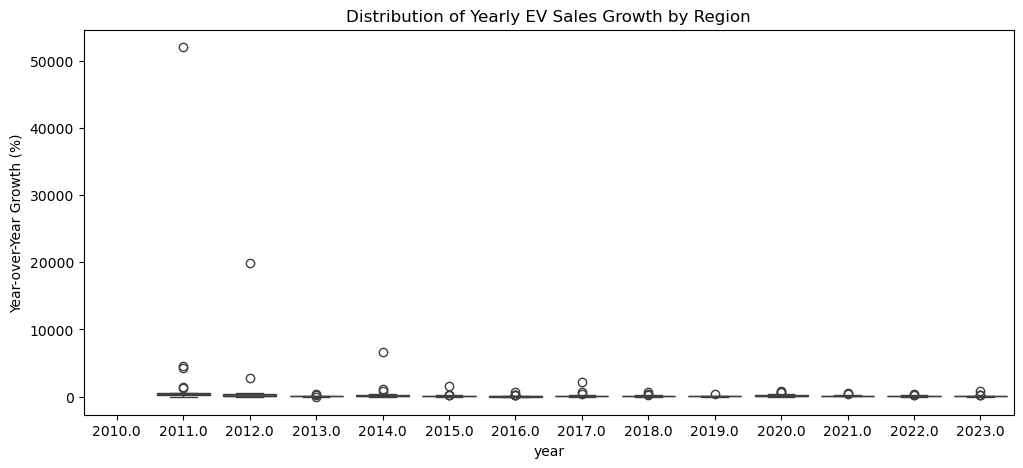

Outliers in EV Sales: 718


,region,category,parameter,mode,powertrain,year,unit,value
50,australia,Historical,EV sales,Cars,PHEV,2019.0,Vehicles,2900.0
55,australia,Historical,EV sales,Cars,BEV,2019.0,Vehicles,6300.0
58,australia,Historical,EV sales,Cars,BEV,2020.0,Vehicles,5200.0
64,australia,Historical,EV sales,Cars,PHEV,2021.0,Vehicles,3400.0
71,australia,Historical,EV sales,Cars,BEV,2021.0,Vehicles,17000.0


In [13]:
# Import required libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# --- Top 10 Regions by Total EV Sales ---
region_sales = df_sales.groupby("region")["value"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=region_sales.values, y=region_sales.index, palette="viridis")
plt.title("Top 10 Regions by Total EV Sales")
plt.xlabel("Vehicles Sold")
plt.ylabel("Region")
plt.show()

# --- Yearly Trend Across All Regions ---
trend = df_sales.groupby("year")["value"].sum().reset_index()
plt.figure(figsize=(10,5))
sns.lineplot(data=trend, x="year", y="value", marker="o")
plt.title("Global EV Sales Trend Over Time (Excluding World)")
plt.ylabel("Total EV Sales (Vehicles)")
plt.show()

# --- EV Sales by Powertrain ---
powertrain_trend = df_sales.groupby(["year", "powertrain"])["value"].sum().reset_index()
plt.figure(figsize=(10,5))
sns.lineplot(data=powertrain_trend, x="year", y="value", hue="powertrain", marker="o")
plt.title("EV Sales by Powertrain Over Time")
plt.ylabel("Sales (Vehicles)")
plt.show()

# --- EV Sales by Vehicle Mode ---
mode_trend = df_sales.groupby(["year", "mode"])["value"].sum().reset_index()
plt.figure(figsize=(10,5))
sns.lineplot(data=mode_trend, x="year", y="value", hue="mode", marker="o")
plt.title("EV Sales by Vehicle Mode (Cars, Vans, Trucks, Buses)")
plt.ylabel("Sales (Vehicles)")
plt.show()

# --- Correlation Heatmap by Powertrain (Pivoted Data) ---
pivot_df = df_sales.pivot_table(index="year", columns="powertrain", values="value", aggfunc="sum").fillna(0)
plt.figure(figsize=(6,4))
sns.heatmap(pivot_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Different Powertrain Sales")
plt.show()

# --- Regional Growth Analysis ---
region_yearly = df_sales.groupby(["region", "year"])["value"].sum().reset_index()
region_yearly["pct_change"] = region_yearly.groupby("region")["value"].pct_change() * 100

plt.figure(figsize=(12,5))
sns.boxplot(x="year", y="pct_change", data=region_yearly)
plt.title("Distribution of Yearly EV Sales Growth by Region")
plt.ylabel("Year-over-Year Growth (%)")
plt.show()

# --- Outlier Detection ---
Q1 = df_sales["value"].quantile(0.25)
Q3 = df_sales["value"].quantile(0.75)
IQR = Q3 - Q1
outliers = df_sales[(df_sales["value"] < (Q1 - 1.5 * IQR)) | (df_sales["value"] > (Q3 + 1.5 * IQR))]

print("Outliers in EV Sales:", outliers.shape[0])
outliers.head()

In [15]:
# ==============================
# ⚙️ FEATURE ENGINEERING
# ==============================

import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Start from cleaned and filtered sales dataset
df = pd.read_csv("C:/Users/Gokul/Downloads/IEA Global EV Data 2024.csv")

# Filter only EV sales rows (if not already done)
df = df[df["parameter"].str.contains("EV sales", case=False, na=False)]

# Clean columns
df.columns = df.columns.str.strip().str.lower()

# Remove world data
df = df[~df["region"].str.contains("world", case=False, na=False)]

# Convert datatypes
df["year"] = pd.to_numeric(df["year"], errors="coerce")
df["value"] = pd.to_numeric(df["value"], errors="coerce")
df.dropna(subset=["value"], inplace=True)

# Rename for clarity
df.rename(columns={"value": "sales"}, inplace=True)

# Sort for lag calculation
df.sort_values(by=["region", "year"], inplace=True)

# 1️⃣ Lag Feature (previous year sales)
df["lag_1"] = df.groupby("region")["sales"].shift(1)

# 2️⃣ Year-over-year sales growth (%)
df["sales_growth_rate"] = ((df["sales"] - df["lag_1"]) / df["lag_1"]) * 100

# 3️⃣ Average sales by region
avg_sales = df.groupby("region")["sales"].transform("mean")
df["avg_sales_by_region"] = avg_sales

# 4️⃣ Flag top 5 regions (binary feature)
top_regions = df.groupby("region")["sales"].sum().nlargest(5).index
df["is_top_region"] = df["region"].isin(top_regions).astype(int)

# 5️⃣ Encode categorical variables
label_cols = ["region", "powertrain", "mode"]
encoder = LabelEncoder()

for col in label_cols:
    df[col] = encoder.fit_transform(df[col].astype(str))

# Drop missing lag values (first year of each region)
df = df.dropna(subset=["lag_1"])

# Final feature set
features = ["year", "region", "powertrain", "mode", "lag_1",
            "sales_growth_rate", "avg_sales_by_region", "is_top_region"]
target = "sales"

X = df[features]
y = df[target]

print("✅ Feature Engineering Complete")
print("Final feature columns:", X.columns.tolist())
X.head()

✅ Feature Engineering Complete
Final feature columns: ['year', 'region', 'powertrain', 'mode', 'lag_1', 'sales_growth_rate', 'avg_sales_by_region', 'is_top_region']


,year,region,powertrain,mode,lag_1,sales_growth_rate,avg_sales_by_region,is_top_region
2,2011.0,0,0,1,0.0065,753746.153846,4498.230744,0
5,2012.0,0,0,1,49.0000,246.938776,4498.230744,0
6,2012.0,0,1,1,170.0000,-99.982353,4498.230744,0
9,2012.0,0,3,1,0.0300,266566.675556,4498.230744,0
10,2013.0,0,3,1,80.0000,25.000000,4498.230744,0


📈 Linear Regression Performance:
R² Score: 0.047
RMSE: 311,448

🌲 Random Forest Performance:
R² Score: 0.620
RMSE: 196,578

✅ Model Comparison:
Linear Regression - R²: 0.047, RMSE: 311,448
Random Forest      - R²: 0.620, RMSE: 196,578


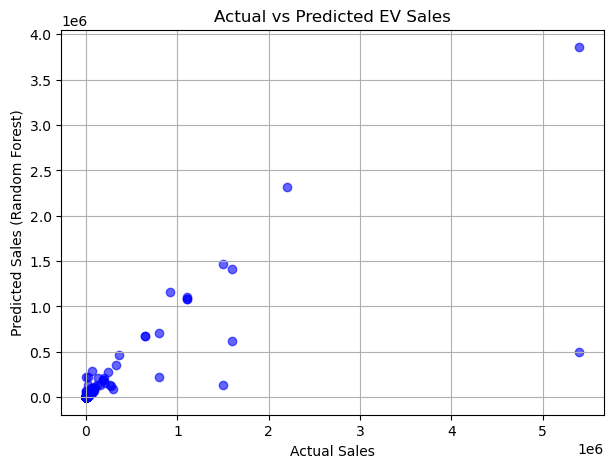

In [17]:
# ==================================
# 🚀 MODEL TRAINING AND EVALUATION
# ==================================

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming X (features) and y (target) are already created from previous step

# 1️⃣ Split into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2️⃣ Train a Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluation Metrics
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print("📈 Linear Regression Performance:")
print(f"R² Score: {r2_lr:.3f}")
print(f"RMSE: {rmse_lr:,.0f}")

# 3️⃣ Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print("\n🌲 Random Forest Performance:")
print(f"R² Score: {r2_rf:.3f}")
print(f"RMSE: {rmse_rf:,.0f}")

# 4️⃣ Compare Models
print("\n✅ Model Comparison:")
print(f"Linear Regression - R²: {r2_lr:.3f}, RMSE: {rmse_lr:,.0f}")
print(f"Random Forest      - R²: {r2_rf:.3f}, RMSE: {rmse_rf:,.0f}")

# 5️⃣ Visualize Predictions
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred_rf, color='blue', alpha=0.6)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales (Random Forest)")
plt.title("Actual vs Predicted EV Sales")
plt.grid(True)
plt.show()

C:\Users\Gokul\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Walk-forward (last 3 years) MAE: 2,957,052, RMSE: 2,957,091


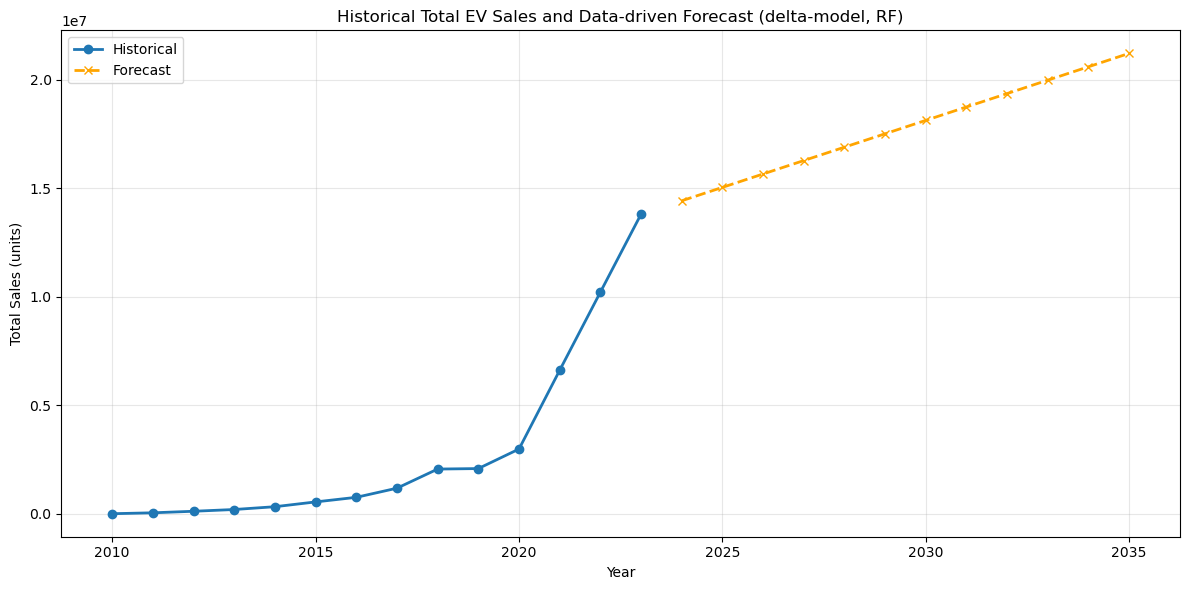


Forecast (next years):
 year predicted_sales
 2024      14,426,509
 2025      15,044,118
 2026      15,661,728
 2027      16,279,337
 2028      16,896,946
 2029      17,514,555
 2030      18,132,164
 2031      18,749,773
 2032      19,367,383
 2033      19,984,992
 2034      20,602,601
 2035      21,220,210


In [5]:
# Realistic data-driven forecast (predicting deltas) — RandomForest + iterative forecast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error


df = df_model_data.copy().sort_values('year').reset_index(drop=True)


df['lag_1'] = df['total_sales'].shift(1)
df['delta'] = df['total_sales'] - df['lag_1']                 # what we'll model
df['pct_change'] = df['delta'] / df['lag_1']                 # percent change (might be inf or nan)
df['rolling_3'] = df['total_sales'].rolling(3, min_periods=1).mean()
df['trend'] = df['year'] - df['year'].min()
# Remove first row(s) where lag/ delta not available
df_model = df.dropna(subset=['lag_1', 'delta']).reset_index(drop=True)

test_years = 3
train_df = df_model.iloc[:-test_years].copy()
val_df = df_model.iloc[-test_years:].copy()

features = ['year', 'lag_1', 'rolling_3', 'trend']  # features to use to predict delta
target = 'delta'

# Train RandomForest on delta
rf = RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1)
rf.fit(train_df[features], train_df[target])

# -------------------------
# 3) Walk-forward validation (simulate forecasting each of the last test_years)
# -------------------------
preds = []
actuals = []
# start from the end of train_df as seed
seed_df = df_model.iloc[:len(train_df)].copy()
for i in range(test_years):
    # take last known series to seed
    history = pd.concat([seed_df, val_df.iloc[:i]])  # seed + any previously "predicted" that we will actually use true values from val_df
    last_row = history.iloc[-1]
    # prepare X for next year (the year we need to predict)
    next_year = int(last_row['year'] + 1)
    X_next = pd.DataFrame({
        'year': [next_year],
        'lag_1': [last_row['total_sales']],
        'rolling_3': [history['total_sales'].tail(3).mean()],
        'trend': [next_year - df['year'].min()]
    })
    pred_delta = rf.predict(X_next)[0]

    max_growth_pct = 0.6   # 60% annual max growth cap (conservative)
    max_delta = X_next['lag_1'].iloc[0] * max_growth_pct
    pred_delta = np.clip(pred_delta, -X_next['lag_1'].iloc[0], max_delta)
    # compute predicted sales
    pred_sales = X_next['lag_1'].iloc[0] + pred_delta
    preds.append(pred_sales)
    actuals.append(val_df.iloc[i]['total_sales'])
    # append the actual observed value from val_df to seed_df so next prediction uses true history (walk-forward)
    seed_df = pd.concat([seed_df, val_df.iloc[[i]]], ignore_index=True)

# Metrics on walk-forward
mae = mean_absolute_error(actuals, preds)
rmse = mean_squared_error(actuals, preds, squared=False)
print(f"Walk-forward (last {test_years} years) MAE: {mae:,.0f}, RMSE: {rmse:,.0f}")

# -------------------------
# 4) Iterative forecast 2024-2030 (or from next year after last historical row)
# -------------------------
horizon = 12  # e.g., 2024-2030 inclusive if last year is 2023
last_known = df.iloc[-1].copy()
future_years = [int(last_known['year'] + i) for i in range(1, horizon+1)]

future_rows = []
prev_sales = float(last_known['total_sales'])
history_sales = list(df['total_sales'].values)  # will extend with predictions

# Safety params
max_growth_pct = 0.5   # maximum allowed growth per year (50%)
damping = 0.95         # slowly damp predicted delta each step (prevents explosion)

for year in future_years:
    X_next = pd.DataFrame({
        'year': [year],
        'lag_1': [prev_sales],
        'rolling_3': [np.mean(history_sales[-3:])],
        'trend': [year - df['year'].min()]
    })
    pred_delta = rf.predict(X_next)[0]
    # Apply damping and caps
    pred_delta = pred_delta * damping
    max_delta = X_next['lag_1'].iloc[0] * max_growth_pct
    pred_delta = np.clip(pred_delta, -X_next['lag_1'].iloc[0], max_delta)
    pred_sales = X_next['lag_1'].iloc[0] + pred_delta
    # Ensure non-negative
    pred_sales = max(0.0, pred_sales)
    future_rows.append({'year': year, 'predicted_sales': pred_sales})
    # update history
    history_sales.append(pred_sales)
    prev_sales = pred_sales

forecast_df = pd.DataFrame(future_rows)

# -------------------------
# 5) Plot historical + forecast
# -------------------------
plt.figure(figsize=(12,6))
plt.plot(df['year'], df['total_sales'], marker='o', label='Historical', linewidth=2)
plt.plot(forecast_df['year'], forecast_df['predicted_sales'], marker='x', linestyle='--', color='orange', label='Forecast', linewidth=2)
plt.title('Historical Total EV Sales and Data-driven Forecast (delta-model, RF)')
plt.xlabel('Year'); plt.ylabel('Total Sales (units)')
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# -------------------------
# 6) Show forecast table
# -------------------------
print("\nForecast (next years):")
print(forecast_df.to_string(index=False, formatters={'predicted_sales': '{:,.0f}'.format}))

# Save results if desired
# forecast_df.to_csv('ev_forecast_delta_rf_2024_2030.csv', index=False)


Loaded aggregated historical data.
Performing feature engineering (log transform).
Model training complete.
Forecasting future sales (2024-2030)...

--- Forecasted EV Sales (Exponential Model) ---
|   year |   forecasted_sales |
|-------:|-------------------:|
|   2024 |         30,608,956 |
|   2025 |         50,200,532 |
|   2026 |         82,331,895 |
|   2027 |        135,029,265 |
|   2028 |        221,456,126 |
|   2029 |        363,201,382 |
|   2030 |        595,672,138 |

--- Plotting Historical Data vs. Exponential Forecast ---
Forecast plot created. Displaying plot...


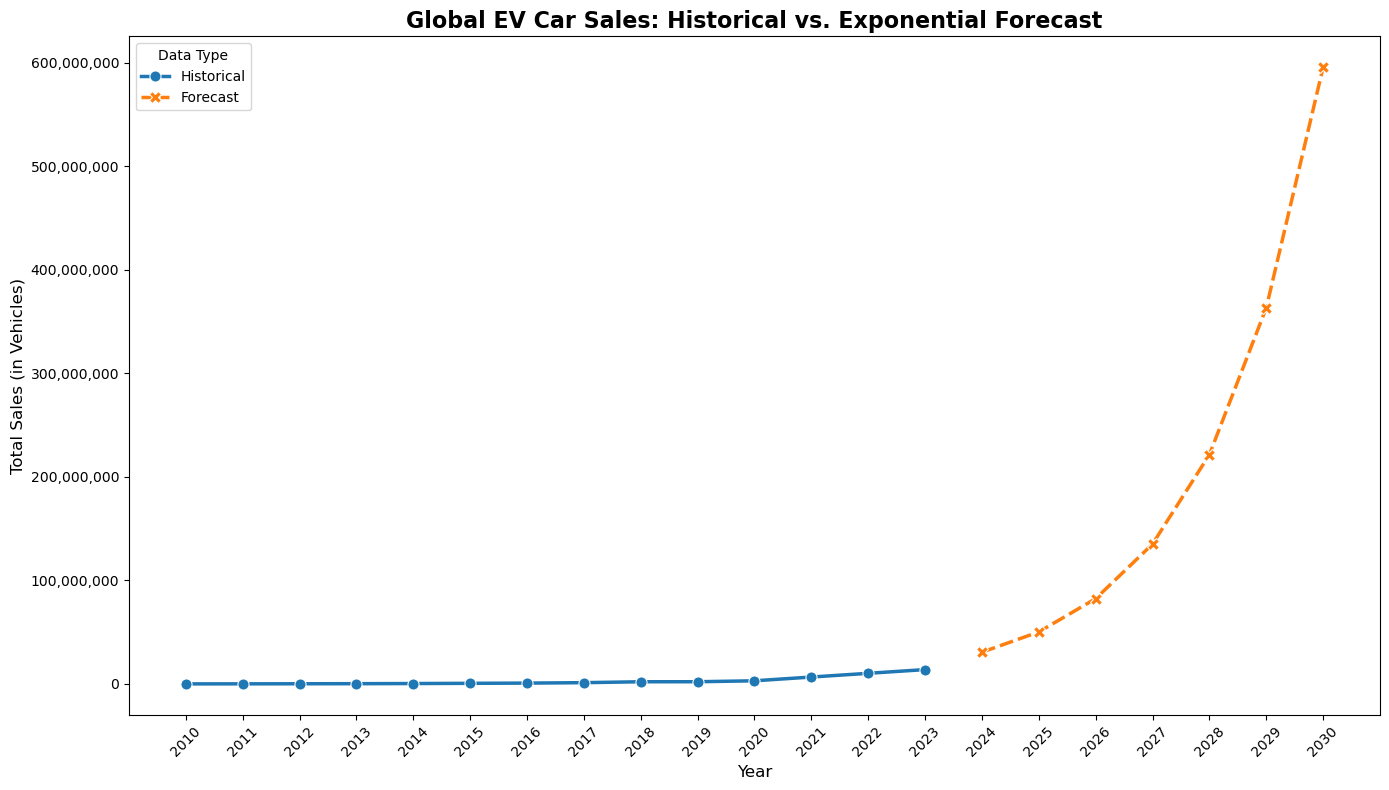


--- ANALYSIS OF THIS FORECAST ---
This forecast is based *only* on the 2010-2023 trend.
Because that trend was exponential, the model predicts continued exponential growth.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# --- 1. Load and Prepare Data (from Cell 2) ---
# Ensure you have run Cell 2 first to create this file.
try:
    df_model_data = pd.read_csv('ev_sales_world_cars_historical_aggregated.csv')
    print("Loaded aggregated historical data.")
except FileNotFoundError:
    print("ERROR: 'ev_sales_world_cars_historical_aggregated.csv' not found.")
    print("Please re-run Cell 2 (Data Loading and Cleaning) first.")

# --- 2. Feature Engineering (from Cell 4) ---
# We linearize the exponential trend by taking the log
df_model_data['log_sales'] = np.log(df_model_data['total_sales'])

# Define features (X) and target (y)
X_train = df_model_data[['year']]
y_train = df_model_data['log_sales']

print("Performing feature engineering (log transform).")

# --- 3. Model Training (from Cell 5) ---
# We use a Linear Regression model on the log-transformed data
model = LinearRegression()
model.fit(X_train, y_train)

print("Model training complete.")

# --- 4. Future Prediction (from Cell 7) ---
print("Forecasting future sales (2024-2030)...")

# Define future years
future_years = np.array([2024, 2025, 2026, 2027, 2028, 2029, 2030])
df_future = pd.DataFrame(future_years, columns=['year'])

# Predict in log-space
future_pred_log = model.predict(df_future)

# **CRITICAL:** Transform back to original numbers
future_pred_original = np.exp(future_pred_log)

# Create the forecast DataFrame
df_forecast = pd.DataFrame({
    'year': future_years,
    'forecasted_sales': future_pred_original
})

print("\n--- Forecasted EV Sales (Exponential Model) ---")
# This is the corrected line to avoid the TypeError
print(df_forecast.to_markdown(index=False, floatfmt=(".0f", ",.0f")))

print("\n--- Plotting Historical Data vs. Exponential Forecast ---")

# Combine historical data with the new forecast
df_plot_all = pd.concat([
    df_model_data.rename(columns={'total_sales': 'value'}).assign(type='Historical'),
    df_forecast.rename(columns={'forecasted_sales': 'value'}).assign(type='Forecast')
])

# Create the plot
plt.figure(figsize=(14, 8))
ax = sns.lineplot(
    x='year',
    y='value',
    data=df_plot_all,
    hue='type',
    style='type',
    markers=True,
    markersize=8,
    linewidth=2.5
)

# Format Y-axis
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

# Set titles and labels
plt.title('Global EV Car Sales: Historical vs. Exponential Forecast', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Sales (in Vehicles)', fontsize=12)
plt.legend(title='Data Type')

# Set x-ticks to show all years clearly
all_years = df_plot_all['year'].unique()
plt.xticks(all_years, rotation=45) 

print("Forecast plot created. Displaying plot...")
plt.tight_layout()
plt.show()
print("\n--- ANALYSIS OF THIS FORECAST ---")
print("This forecast is based *only* on the 2010-2023 trend.")
print("Because that trend was exponential, the model predicts continued exponential growth.")